In [46]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [47]:
# Load data
df=pd.read_csv("Product_Transation_Details_Nov2022-Jan2023 - ABC Analysis.csv")
df.head()

,Item name,Billed Qty,Product MRP,Sales Unit,Product Cost (without tax),Product Tax %,Profit Margin,Cumulative Profit Margin,Unnamed: 8,Unnamed: 9,...,Profit Margin Unique SORTED,Unnamed: 17,Cumulative Profit Margin.1,Cumulative Profit Margin Unique %,Cumulative Profit Margin Unique % SUM,Category,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,UDILIV 300MG,300,694.19,15,502.46,5,3332.1400,3332.1400,NaN,NaN,...,11234.30900,0.58%,"11,234.31",0.58%,0.58%,A,NaN,NaN,NaN,NaN
1,RELIPOIETIN 4000IU PFS INJ,4,1056.00,1,200.00,12,3328.0000,6660.1400,NaN,NaN,...,10960.12757,1.15%,"22,194.44",0.57%,1.15%,A,NaN,NaN,NaN,NaN
2,MAGNEX FORTE 1.5GM INJ,8,729.06,1,380.56,12,2422.6624,9082.8024,NaN,NaN,...,9277.21184,1.63%,"31,471.65",0.48%,1.63%,A,NaN,NaN,NaN,NaN
3,RYZODEG FLEXTOUCH 3ML,10,1450.00,1,1160.00,5,2320.0000,11402.8024,NaN,NaN,...,9187.65120,2.11%,"40,659.30",0.48%,2.11%,A,NaN,NaN,NaN,NaN
4,DARGEN 40 INJ,2,2506.80,1,1339.29,12,2013.5904,13416.3928,NaN,NaN,...,9061.15680,2.58%,"49,720.46",0.47%,2.58%,A,NaN,NaN,NaN,NaN


In [48]:
df.shape

(42298, 26)

In [49]:
df.isnull().sum()

Item name                                    0
Billed Qty                                   0
Product MRP                                  0
Sales Unit                                   0
Product Cost (without tax)                   0
Product Tax %                                0
Profit Margin                                0
Cumulative Profit Margin                     0
Unnamed: 8                               42298
Unnamed: 9                               42298
Unnamed: 10                              42298
Unnamed: 11                              42298
Unique Items                             36033
Cumulative Profit Margin Unique          36033
Unnamed: 14                              42298
SORTED Unique Items                      36047
Profit Margin Unique SORTED              36033
Unnamed: 17                              36047
Cumulative Profit Margin.1               36047
Cumulative Profit Margin Unique %        36033
Cumulative Profit Margin Unique % SUM    36033
Category     

In [50]:

# Calculate Total Value
df['Total Value'] = df['Billed Qty'] * df['Product MRP']

# Sort by Total Value in descending order
df = df.sort_values(by='Total Value', ascending=False).reset_index(drop=True)

# Calculate Cumulative Value and Cumulative Percentage
df['Cumulative Value'] = df['Total Value'].cumsum()
df['Cumulative Percentage'] = df['Cumulative Value'] / df['Total Value'].sum() * 100

# Classify Items into A, B, and C
def classify(row):
    if row['Cumulative Percentage'] <= 70:
        return 'A'
    elif row['Cumulative Percentage'] <= 90:
        return 'B'
    else:
        return 'C'

df['Category'] = df.apply(classify, axis=1)


# Display the result
df[['Item name', 'Billed Qty', 'Product MRP', 'Total Value', 'Cumulative Value', 'Cumulative Percentage', 'Category']]


,Item name,Billed Qty,Product MRP,Total Value,Cumulative Value,Cumulative Percentage,Category
0,UDILIV 300MG,300,694.19,208257.0,208257.00,0.326217,A
1,SAMAHAN INSTANT PEYAVA,200,600.00,120000.0,328257.00,0.514187,A
2,GLOVES {LARGE} 5.75,200,575.00,115000.0,443257.00,0.694324,A
3,EPILAN 150'S,150,591.73,88759.5,532016.50,0.833359,A
4,ZITEN M 20/1000MG,300,288.50,86550.0,618566.50,0.968932,A
...,...,...,...,...,...,...,...
42293,FARM PRODUCT BANANA,1,6.00,6.0,63840109.73,100.000110,C
42294,FARM PRODUCT BANANA,1,5.00,5.0,63840114.73,100.000117,C
42295,FARM PRODUCT BANANA,1,5.00,5.0,63840119.73,100.000125,C
42296,FARM PRODUCT BANANA,1,5.00,5.0,63840124.73,100.000133,C


In [53]:
category=df["Category"].value_counts().sort_values()
category

A     7636
B     9343
C    25319
Name: Category, dtype: int64

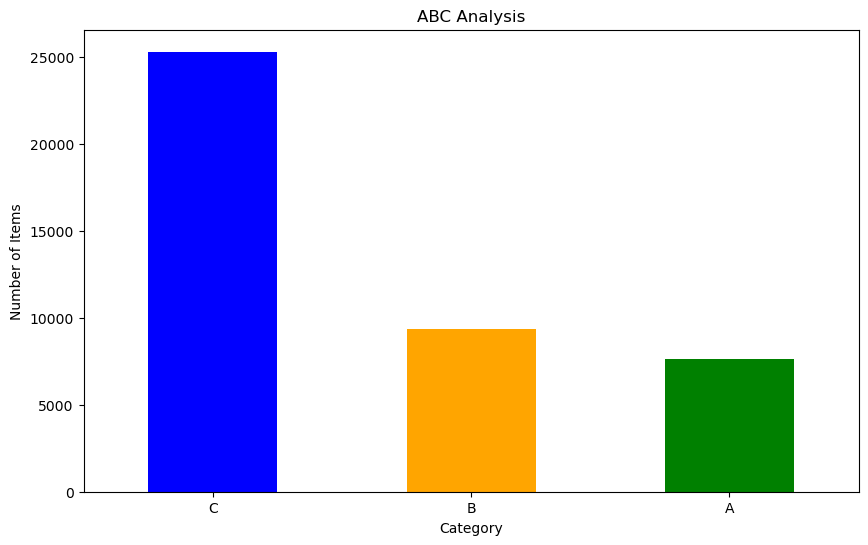

In [52]:
plt.figure(figsize=(10, 6))
category.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('ABC Analysis')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.xticks(rotation=0)
plt.show()

In [57]:
Cat_A=df[df["Category"]=="A"]
Cat_A.head()

,Item name,Billed Qty,Product MRP,Sales Unit,Product Cost (without tax),Product Tax %,Profit Margin,Cumulative Profit Margin,Unnamed: 8,Unnamed: 9,...,Cumulative Profit Margin Unique %,Cumulative Profit Margin Unique % SUM,Category,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Total Value,Cumulative Value,Cumulative Percentage
0,UDILIV 300MG,300,694.19,15,502.46,5,3332.1400,3332.1400,NaN,NaN,...,0.58%,0.58%,A,NaN,NaN,NaN,NaN,208257.0,208257.0,0.326217
1,SAMAHAN INSTANT PEYAVA,200,600.00,50,446.25,12,400.8000,159554.1270,NaN,NaN,...,0.07%,31.15%,A,NaN,NaN,NaN,NaN,120000.0,328257.0,0.514187
2,GLOVES {LARGE} 5.75,200,575.00,100,269.50,12,546.3200,117793.8333,NaN,NaN,...,0.10%,23.72%,A,NaN,NaN,NaN,NaN,115000.0,443257.0,0.694324
3,EPILAN 150'S,150,591.73,150,401.53,12,142.0164,571806.7018,NaN,NaN,...,0.01%,82.46%,A,NaN,NaN,NaN,NaN,88759.5,532016.5,0.833359
4,ZITEN M 20/1000MG,300,288.50,15,195.77,12,1384.7520,28004.8074,NaN,NaN,...,0.30%,5.85%,A,NaN,NaN,NaN,NaN,86550.0,618566.5,0.968932


In [58]:
Cat_B=df[df["Category"]=="B"]
Cat_B.head()

,Item name,Billed Qty,Product MRP,Sales Unit,Product Cost (without tax),Product Tax %,Profit Margin,Cumulative Profit Margin,Unnamed: 8,Unnamed: 9,...,Cumulative Profit Margin Unique %,Cumulative Profit Margin Unique % SUM,Category,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Total Value,Cumulative Value,Cumulative Percentage
7636,FACE MASK (4.50) 3 PLY,5,450.0,100,156.80,5,14.268000,1841140.031,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,2250.0,44688911.0,70.001383
7637,FACE MASK (4.50) 3 PLY,5,450.0,100,156.80,5,14.268000,1841125.763,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,2250.0,44691161.0,70.004908
7638,BEEPRED 4MG,15,150.0,15,101.78,12,36.006400,1538569.992,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,2250.0,44693411.0,70.008432
7639,BEEPRED 4MG,15,150.0,15,101.78,12,36.006400,1538786.030,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,2250.0,44695661.0,70.011957
7640,VOGS GM 2MG,20,112.5,15,76.34,12,35.998933,1539722.138,NaN,NaN,...,NaN,NaN,B,NaN,NaN,NaN,NaN,2250.0,44697911.0,70.015481


In [59]:
Cat_C=df[df["Category"]=="C"]
Cat_C.head()

,Item name,Billed Qty,Product MRP,Sales Unit,Product Cost (without tax),Product Tax %,Profit Margin,Cumulative Profit Margin,Unnamed: 8,Unnamed: 9,...,Cumulative Profit Margin Unique %,Cumulative Profit Margin Unique % SUM,Category,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Total Value,Cumulative Value,Cumulative Percentage
16979,LIMCEE,30,25.53,15,17.33,12,12.2408,1864682.555,NaN,NaN,...,NaN,NaN,C,NaN,NaN,NaN,NaN,765.9,57456693.37,90.001030
16980,LIMCEE,30,25.53,15,17.33,12,12.2408,1864658.074,NaN,NaN,...,NaN,NaN,C,NaN,NaN,NaN,NaN,765.9,57457459.27,90.002230
16981,LIMCEE,30,25.53,15,17.33,12,12.2408,1864670.315,NaN,NaN,...,NaN,NaN,C,NaN,NaN,NaN,NaN,765.9,57458225.17,90.003430
16982,LIMCEE,30,25.53,15,17.33,12,12.2408,1864596.870,NaN,NaN,...,NaN,NaN,C,NaN,NaN,NaN,NaN,765.9,57458991.07,90.004629
16983,LIMCEE,30,25.53,15,17.33,12,12.2408,1864584.629,NaN,NaN,...,NaN,NaN,C,NaN,NaN,NaN,NaN,765.9,57459756.97,90.005829
